# ***************************Assignment 2 Team Alpha******************************

                                              


In this part, we will perform exploratory data analysis to gather patterns and insights that can help our client to attract more customers for its 'term deposit' campaign to spend marketing dollars wisely and extract useful insights that will help in feature engineering and importance

Data Exploration:

This section outlines the process followed in obtaining the data, initial setup and understanding the data.
The uci machine learning repository was used to download the banking data for analysis. The repository has 4 data files. However, bank-additional-full.csv with 41188 observations and 20 inputs is randomly selected to upload in Jupyter notebook for further analysis. The data is already cleaned, at least to some extent, with no missing values so there wasn’t too much data cleaning required, hence my focus will be on Exploratory Data Analysis.

In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Algorithms
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree



#Accuracy
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [3]:
bankdata = pd.read_csv(r'C:\Users\hassa\Desktop\studyhard\bank-additional-full.csv', sep=';')

In [4]:
#Pandas doesn't allow to see columns at once so dividing in chunks of 10
bankdata[list(bankdata.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon
1,57,services,married,high.school,unknown,no,no,telephone,may,mon
2,37,services,married,high.school,no,yes,no,telephone,may,mon
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon
4,56,services,married,high.school,no,no,yes,telephone,may,mon


In [5]:
bankdata[list(bankdata.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
print(bankdata.shape)

(41188, 21)


In [7]:
print(bankdata.size)

864948


In [8]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [9]:
bankdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# Data Cleaning

In [10]:
bankdata.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

In [11]:
# function to get all unique values in the categorical variables
def unique_val(bankdata):
    bankdata_columns = bankdata.columns
    for i in bankdata_columns:
        if bankdata[i].dtype == 'O':
            print('Unique values in',i,'are',bankdata[i].unique())
unique_val(bankdata)

Unique values in job are ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in marital are ['married' 'single' 'divorced' 'unknown']
Unique values in education are ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values in default are ['no' 'unknown' 'yes']
Unique values in housing are ['no' 'yes' 'unknown']
Unique values in loan are ['no' 'yes' 'unknown']
Unique values in contact are ['telephone' 'cellular']
Unique values in month are ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week are ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in poutcome are ['nonexistent' 'failure' 'success']
Unique values in y are ['no' 'yes']


In [12]:
print('Sum of missing values')
bankdata.isnull().sum()

Sum of missing values


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Exploratory Data Analysis 

In [13]:
#count the number of rows for each type
bankdata.groupby('y').size()

y
no     36548
yes     4640
dtype: int64

In [14]:
# Percentage of Yes and No
print("\nPercentage of value count in y\n",
      bankdata.y.value_counts(normalize=True)*100)


Percentage of value count in y
 no     88.734583
yes    11.265417
Name: y, dtype: float64


The dataset is imbalanced with only 11.3% of client that has subscribed to the bank term deposit.The problem with this type of imbalanced class result is poor accuracy and error if not treated properly

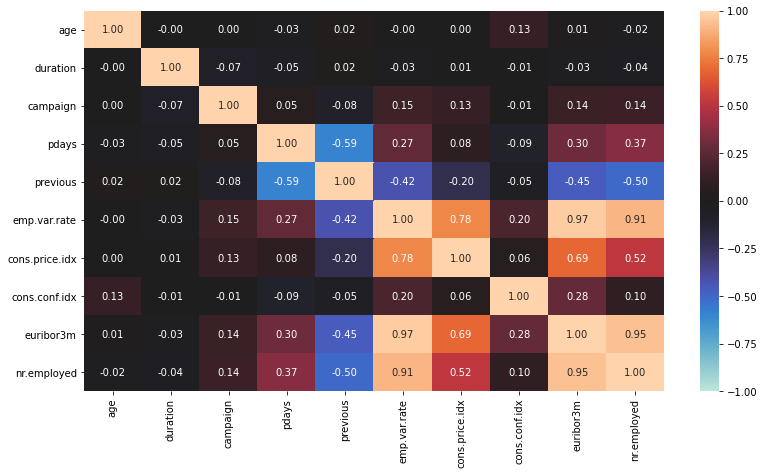

In [15]:
# using heatmap to visualize correlation between the columns
plt.figure(figsize = (13,7))
ax = sns.heatmap(bankdata.corr(), annot=True, fmt='.2f', 
                 vmin=-1, vmax=1, center= 0)

Bivarite Analysis on Categorical Variables

This Marital visualization is important because marital status does have a very high affect if a person wants to sign up for a term deposit or not. Since signing up for a term deposite is a very serious financial decision thus marital status needs to be considered while we research on the dataset.

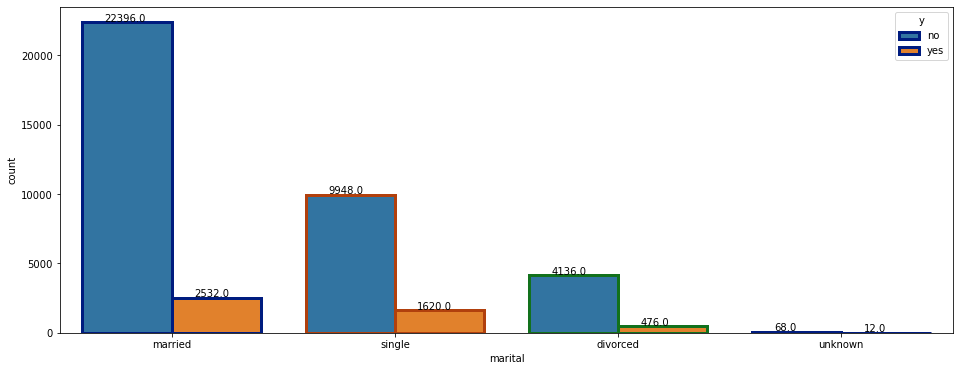

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 6)
ax = sns.countplot(x='marital',hue='y',data=bankdata,
                   linewidth=3,
                   edgecolor=sns.color_palette("dark", 3))

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))

We visualized job type because a person's financial strength can be seen by the type of job he or she is doing. Also a person's knowledge towards investment can also be seen by the type of job he is into. We think job type is a major factor in subscription of the term deposit.

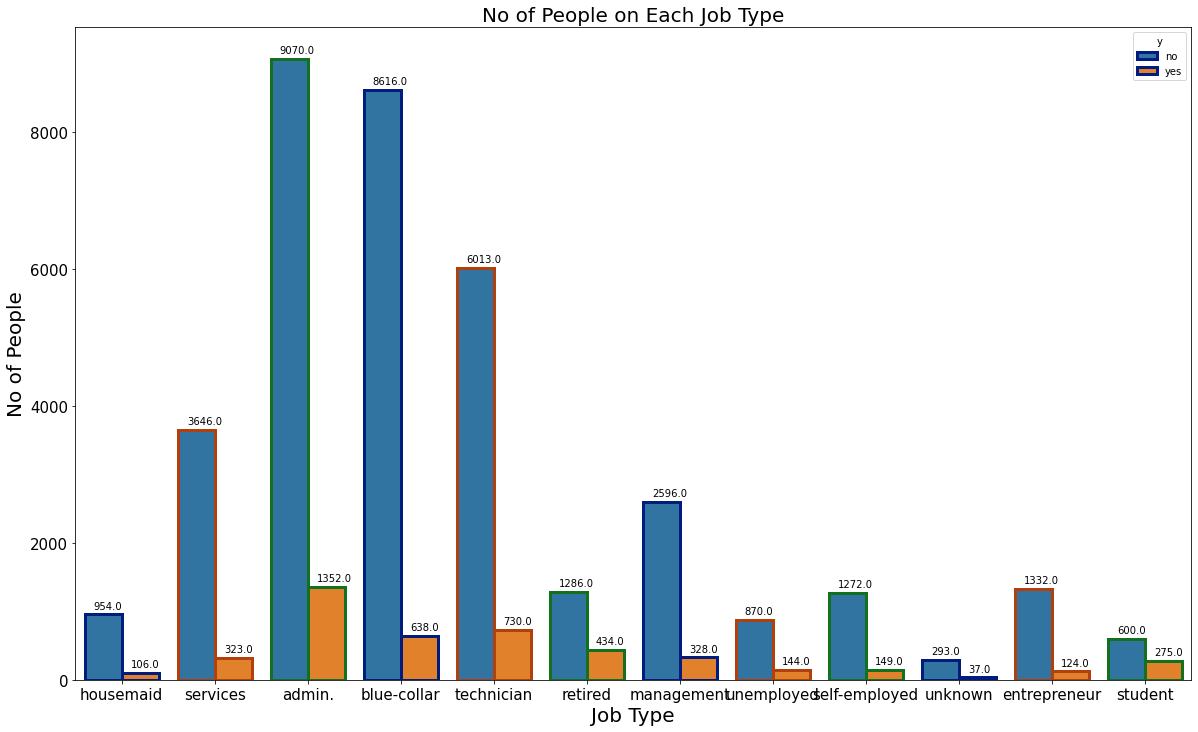

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
sns.countplot(x = 'job', hue='y', data = bankdata,linewidth=3, edgecolor=sns.color_palette("dark", 3))
ax.set_xlabel('Job Type', fontsize=20)
ax.set_ylabel('No of People', fontsize=20)
ax.set_title('No of People on Each Job Type', fontsize=20)
ax.tick_params(labelsize=15)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))

We visualized education level because a financial knowledge towards various types of investments plays a very important role in subscription of the trade deposit.

Text(0.5, 1.0, 'Education')

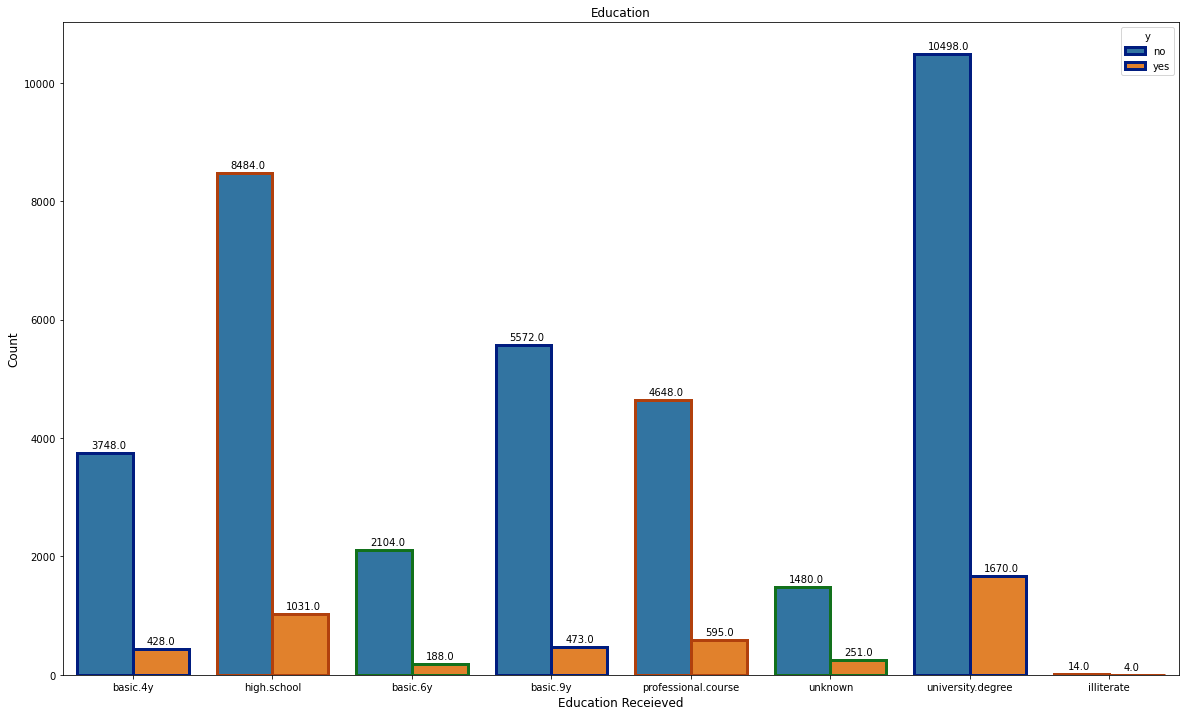

In [18]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
ax = sns.countplot(x = 'education',hue='y',data=bankdata, linewidth=3, edgecolor=sns.color_palette("dark", 3))

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
        
ax.set_xlabel('Education Receieved', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Education', fontsize=12)

The graph below also deduce that people using cellphone will sign up more (14 % )as compare to landline (5%) so best practise is to call cellphone for max term deposit outcome

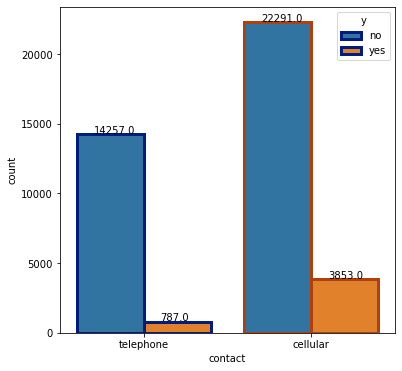

In [19]:
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)

sns.countplot(x='contact',hue='y',data=bankdata, linewidth=3, edgecolor=sns.color_palette("dark", 3))

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
        

A person financial planning changes according to the months of the year. People have more money in different months of the year. A right time for term deposite campaign is important. We visualized this graph to see how each month is doing with respect to the subscription of the term deposit.

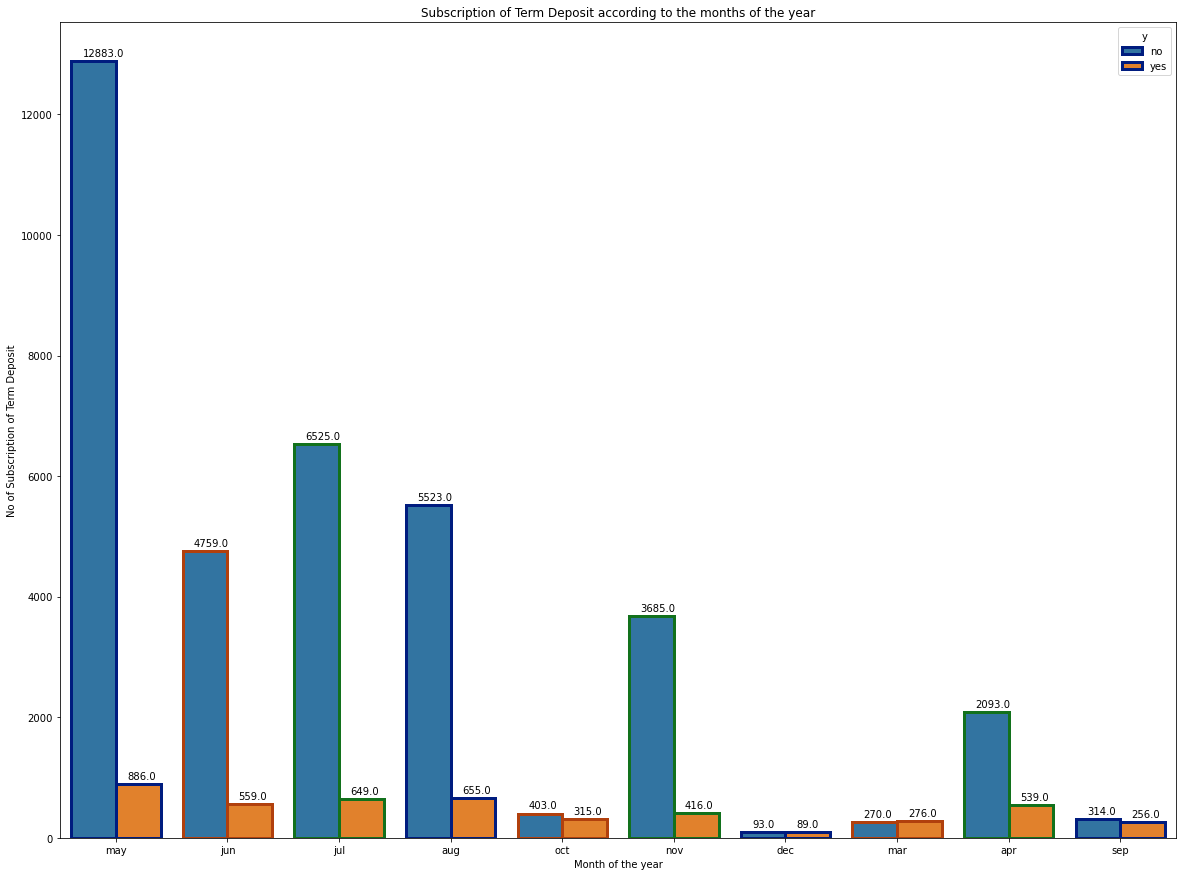

In [20]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

sns.countplot(x='month',hue='y',data=bankdata, linewidth=3, edgecolor=sns.color_palette("dark", 3))

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
        
        plt.title("Subscription of Term Deposit according to the months of the year")
        plt.ylabel("No of Subscription of Term Deposit") 
        plt.xlabel("Month of the year")

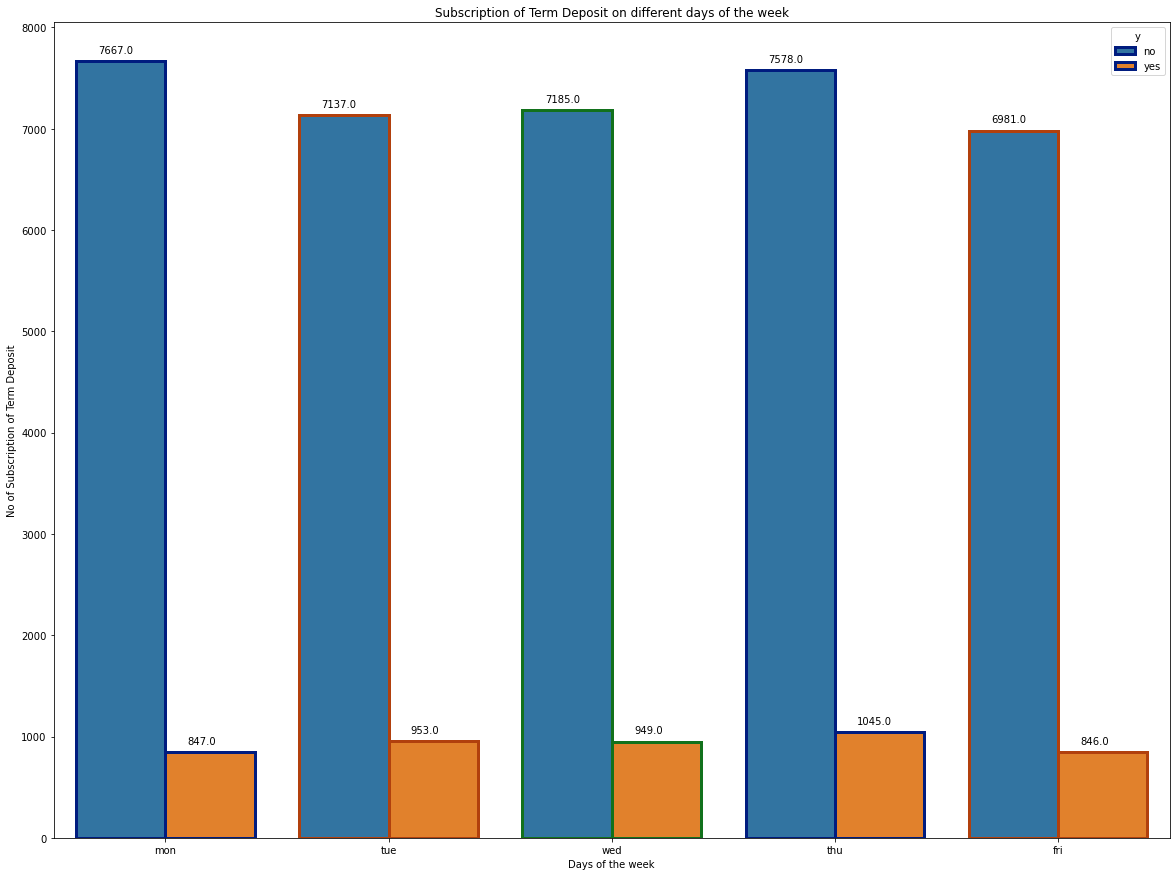

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 15)

ax = sns.countplot(x='day_of_week',hue='y',data=bankdata, linewidth=3, edgecolor=sns.color_palette("dark", 3))

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
                
        plt.title("Subscription of Term Deposit on different days of the week")
        plt.ylabel("No of Subscription of Term Deposit") 
        plt.xlabel("Days of the week")

How likely is that a person will signup for a similar term deposite next time? This graph is important for the bank so the bank can plan its campaign for customers that are have previous term deposits.

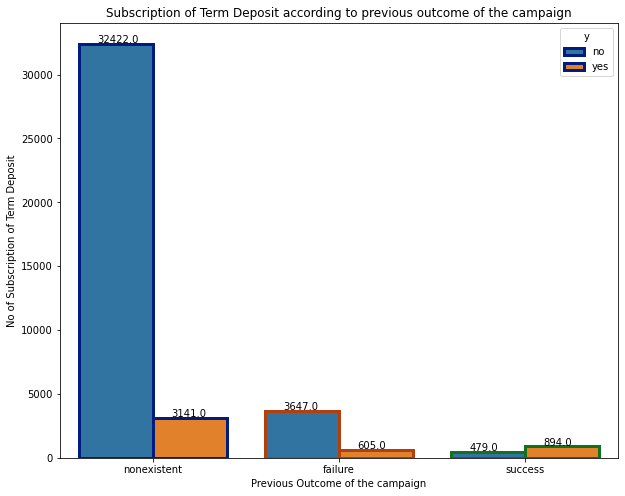

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

ax = sns.countplot(x='poutcome',hue='y',data=bankdata, linewidth=3, edgecolor=sns.color_palette("dark", 3),)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
                
        plt.title("Subscription of Term Deposit according to previous outcome of the campaign")
        plt.ylabel("No of Subscription of Term Deposit") 
        plt.xlabel("Previous Outcome of the campaign")

Default, Housing and Loan gives an insight of the financial standing of a customers. This visualization can help us see how our dataset looks like and what can we predict from this dataset.

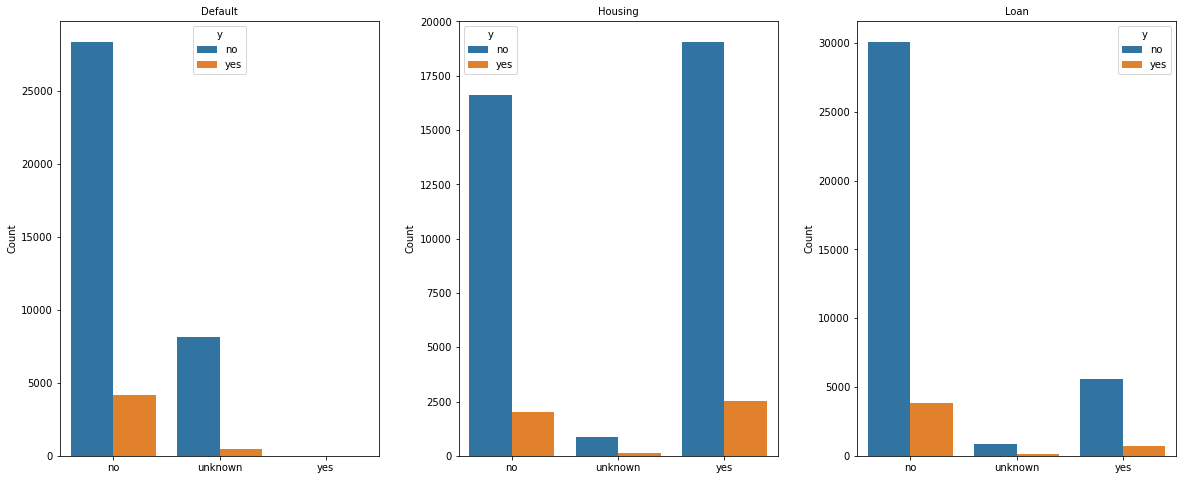

In [23]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,8))
sns.countplot(x = 'default',hue='y', data = bankdata , ax = ax1, order = ['no', 'unknown', 'yes'])
ax1.set_title('Default', fontsize=10)
ax1.set_xlabel('')
ax1.set_ylabel('Count', fontsize=10)
ax1.tick_params(labelsize=10)

sns.countplot(x = 'housing', hue='y',data = bankdata, ax = ax2, order = ['no', 'unknown', 'yes'])
ax2.set_title('Housing', fontsize=10)
ax2.set_xlabel('')
ax2.set_ylabel('Count', fontsize=10)
ax2.tick_params(labelsize=10)

sns.countplot(x = 'loan',hue='y', data = bankdata, ax = ax3, order = ['no', 'unknown', 'yes'])
ax3.set_title('Loan', fontsize=10)
ax3.set_xlabel('')
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)

We decided to seperate the data into 3 parts:
Client Data  : 1-7 columns/variables
Marketing Data: 8-15 columns/variables
Economic Data:  bucket with remaining features

We've divided the data with bins of specific attributes/columns. We have leveraged univariant analysis to check the spread of each categorial variables withing each bucket. During this process, we ran commands to check outliers and fixed the problems using boxplot, imputation, Label Encoder, and one-hot encoding techniques. As a result of this exercise, we got thorough understanding of our data, derived more insights and meaningful information for further analysis.

# Definite Client  Processing

In [24]:
#We've divided the data with bins of first  7 columns 
clientbankdata = bankdata[["age", "job","marital", "education","default","housing","loan"]]
clientbankdata.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


This graph shows the distribution of people in our dataset according tot he job type. This gives an overview of what sample dataset we are dealing with.

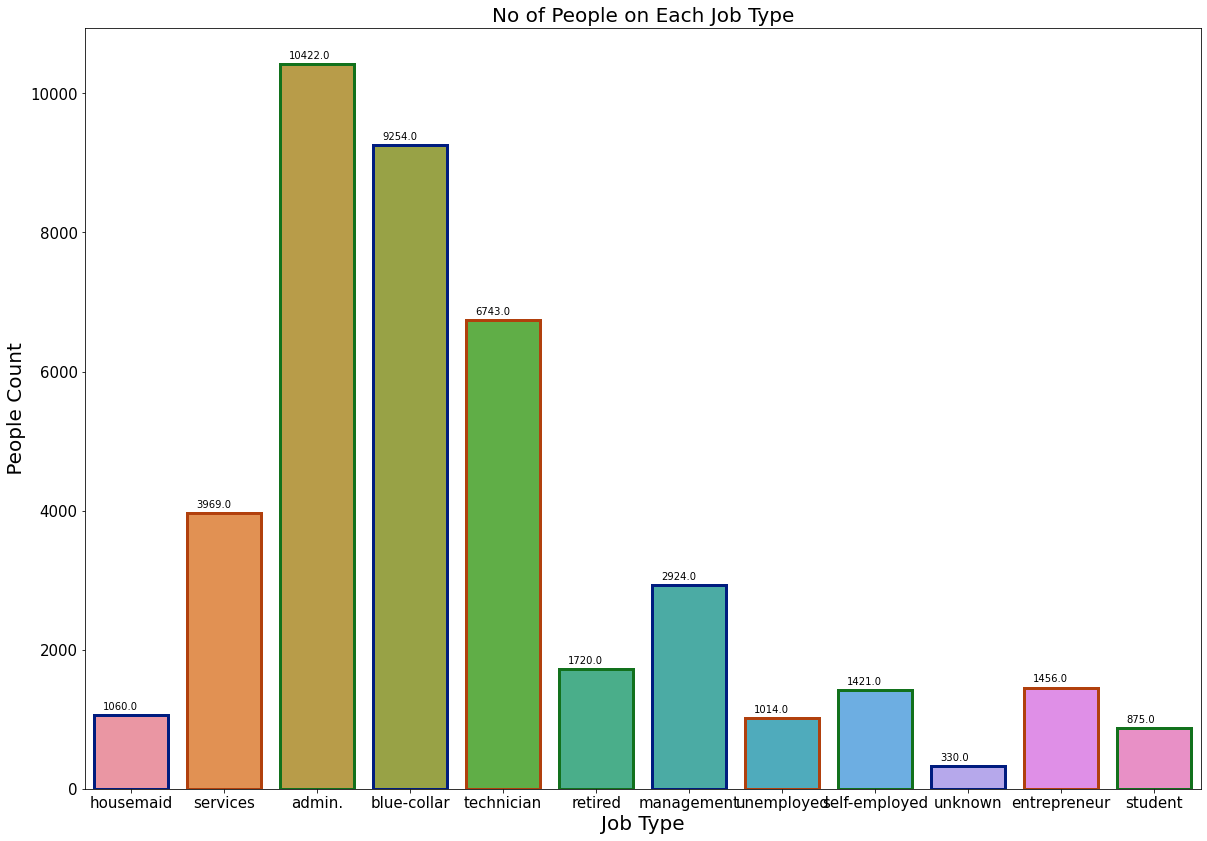

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 14)
sns.countplot(x = 'job',data = clientbankdata,linewidth=3, edgecolor=sns.color_palette("dark", 3))
ax.set_xlabel('Job Type', fontsize=20)
ax.set_ylabel(' People Count ', fontsize=20)
ax.set_title('No of People on Each Job Type', fontsize=20)
ax.tick_params(labelsize=15)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))

The graph below shows most of the bank client are university degree holder and their is a high probability that they will sign up as result shared in marital bivariant analysis above

In [26]:
clientbankdata['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

Text(0.5, 1.0, 'Proportation of people in each martial status')

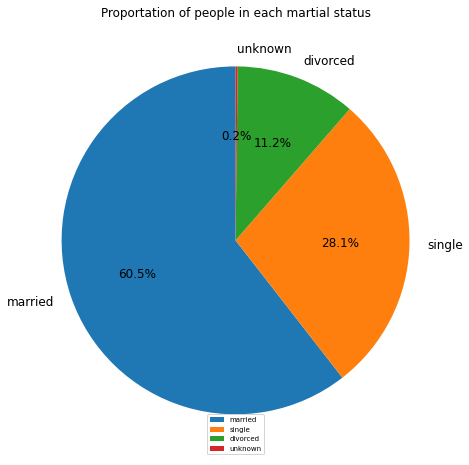

In [27]:
df4 = pd.DataFrame({"Marital Status":["married", "single" , "divorced" , "unknown"], "sum":[24928,11568,4612,80]})
_, ax = plt.subplots(figsize = (8,8))
wedges,_,_ = ax.pie(df4['sum']
                    ,labels=df4["Marital Status"]
                    ,shadow=False,startangle=90, autopct="%1.1f%%"
                    ,textprops={'fontsize': 12})
ax.legend(wedges,df4["Marital Status"], loc="lower center", prop={'size': 7});
plt.title('Proportation of people in each martial status')


The graph below shows most of the  bank client are married couple and their is a high probability that they will sign up as result shared in bivariant analysis above

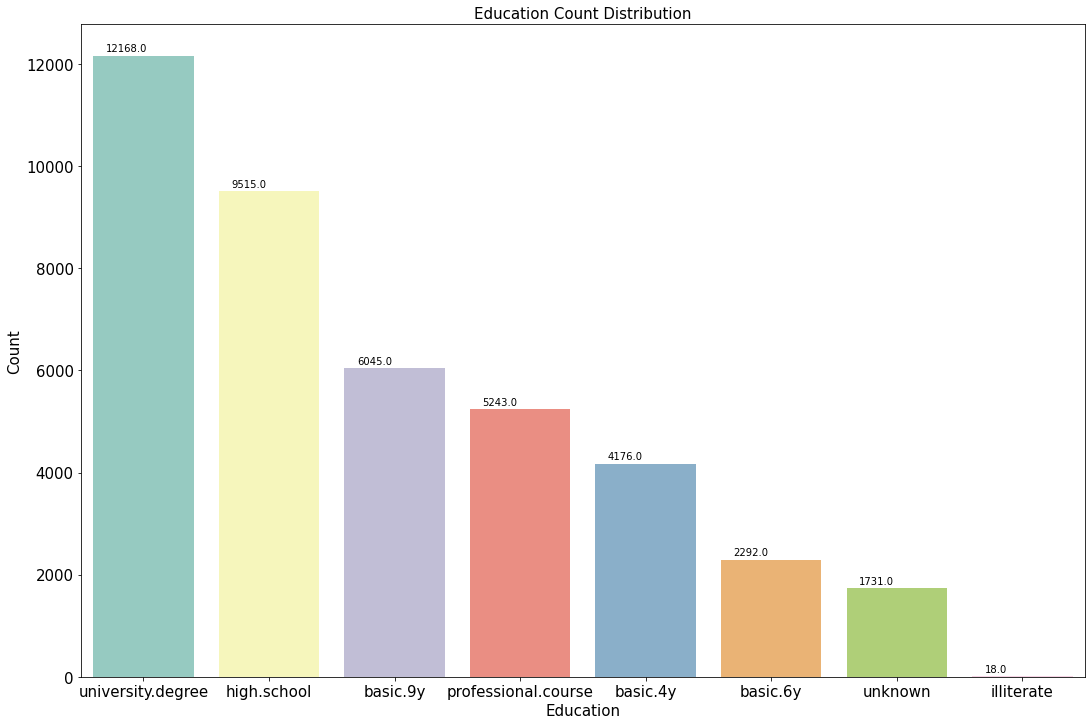

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 12)
sns.countplot(x = 'education', data = clientbankdata,palette="Set3", order = clientbankdata['education'].value_counts().index)

ax.set_xlabel('Education', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Education Count Distribution', fontsize=15)
ax.tick_params(labelsize=15)

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))

The graph below shows bank clients who have housing loan are much more interested in signing up for the term deposit 

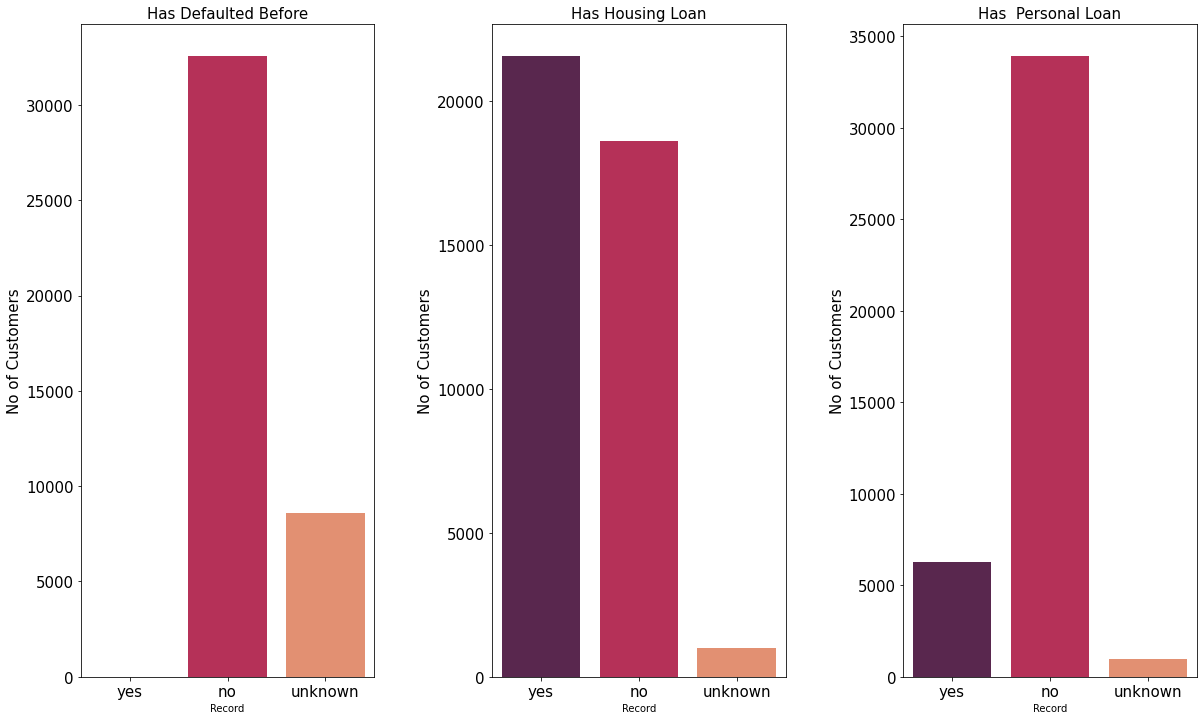

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (20,12))

sns.countplot(x = 'default', data = clientbankdata, ax = ax1, order = ['yes', 'no', 'unknown'],palette="rocket")
ax1.set_title('Has Defaulted Before', fontsize=15)
ax1.set_xlabel('Record')
ax1.set_ylabel('No of Customers', fontsize=15)
ax1.tick_params(labelsize=15)

sns.countplot(x = 'housing', data = clientbankdata, ax = ax2, order = ['yes', 'no', 'unknown'],palette="rocket")
ax2.set_title('Has Housing Loan', fontsize=15)
ax2.set_xlabel('Record')
ax2.set_ylabel('No of Customers', fontsize=15)
ax2.tick_params(labelsize=15)

sns.countplot(x = 'loan', data = clientbankdata, ax = ax3, order = ['yes', 'no', 'unknown'],palette="rocket")
ax3.set_title('Has  Personal Loan', fontsize=15)
ax3.set_xlabel('Record')
ax3.set_ylabel('No of Customers', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4)


Checking the distribution of Age clientbankdata['Age']

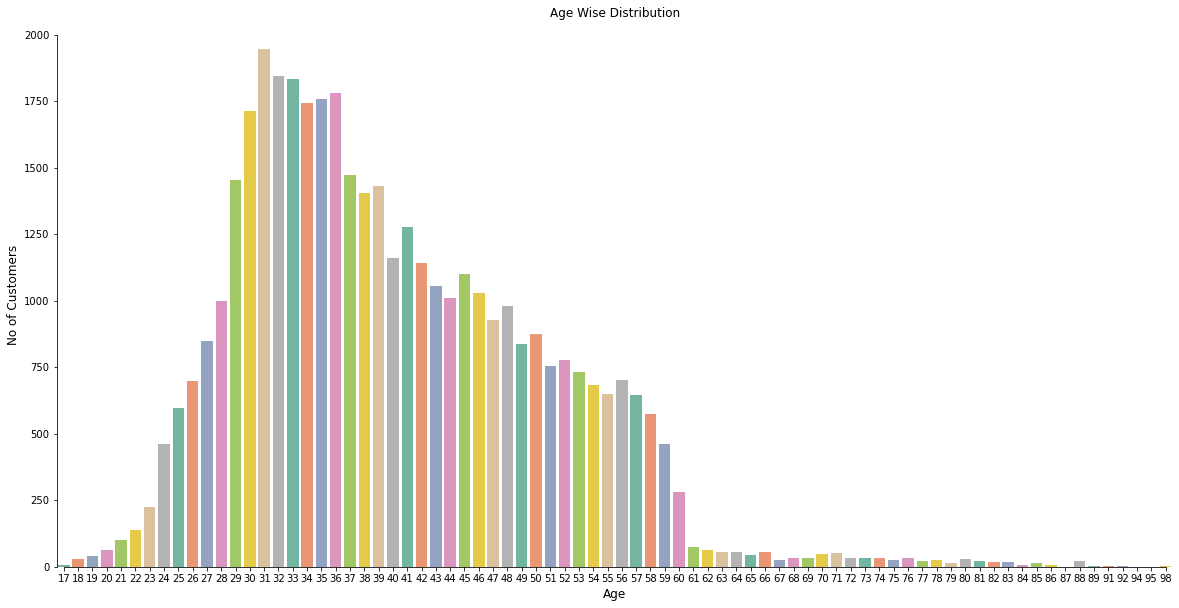

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
sns.countplot(x = 'age', data = clientbankdata,palette="Set2")
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('No of Customers', fontsize=12)
ax.set_title('Age Wise Distribution', fontsize=12)
sns.despine(trim=True)

Age has outliers so using boxplot to find them:

C:\Users\hassa\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


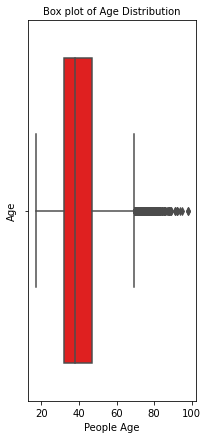

In [31]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (3,7))
sns.boxplot(x = 'age', data = clientbankdata,orient = 'v',color="red")
ax.set_xlabel('People Age', fontsize=10)
ax.set_ylabel('Age', fontsize=10)
ax.set_title('Box plot of Age Distribution', fontsize=10)
ax.tick_params(labelsize=10)

In [32]:
print(clientbankdata.select_dtypes(include='number').isnull().sum())

age    0
dtype: int64


In [33]:
#Create Copy of  clientbankdata for outliers impulation using mean
clientbankdata_copy1 = clientbankdata.copy(deep=True)
clientbankdata_copy1.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [34]:
Q1=clientbankdata_copy1['age'].quantile(q = 0.25)
Q2=clientbankdata_copy1['age'].quantile(q = 0.50) 
Q3=clientbankdata_copy1['age'].quantile(q = 0.75)
Q4=clientbankdata_copy1['age'].quantile(q = 1.00) 
IQR= Q3-Q1

print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)

age_below  = Q1-(1.5*IQR)
print('age_below => ' + str(age_below))

age_above = Q3+(1.5*IQR)
print('age_above => ' + str(age_above))
print("\n")


print('Any age below', Q1 - 1.5*(IQR), 'or above', Q3 + 1.5*(IQR), 'can can be considered as Outliers.')


1st Quartile:  32.0
2nd Quartile:  38.0
3rd Quartile:  47.0
4th Quartile:  98.0
IQR:  15.0
age_below => 9.5
age_above => 69.5


Any age below 9.5 or above 69.5 can can be considered as Outliers.


In [35]:
#replacing outliers with nan
clientbankdata_copy1['age'][((clientbankdata_copy1['age'] < age_below) | (clientbankdata_copy1['age'] > age_above))] = np.nan

<ipython-input-35-a417dcf38afc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clientbankdata_copy1['age'][((clientbankdata_copy1['age'] < age_below) | (clientbankdata_copy1['age'] > age_above))] = np.nan


In [36]:
#finding null values first in age column for imputation purpose
print(clientbankdata_copy1['age'].isnull().sum())

469


In [37]:
column_means = clientbankdata_copy1['age'].mean()
print(column_means)
clientbankdata_copy1['age'] = clientbankdata_copy1['age'].fillna(column_means)

39.599007834180604


In [38]:
#Imputation with means removed null values
print(clientbankdata_copy1['age'].isnull().sum())

0


Using Box plot to check if outliers has been removed?

C:\Users\hassa\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


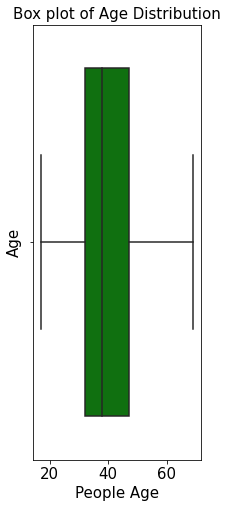

In [39]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (3,8))
sns.boxplot(x = 'age', data = clientbankdata_copy1,orient = 'v',color="green")
ax.set_xlabel('People Age', fontsize=15)
ax.set_ylabel('Age', fontsize=15)
ax.set_title('Box plot of Age Distribution', fontsize=15)
ax.tick_params(labelsize=15)

In [40]:
# functions to create binning in age

def age(dframe):
    dframe.loc[dframe['age'] <= 32, 'age'] = 1 
    dframe.loc[(dframe['age'] > 32) & (dframe['age'] <= 38), 'age'] = 2
    dframe.loc[(dframe['age'] > 38) & (dframe['age'] <=47), 'age'] = 3
    dframe.loc[(dframe['age'] > 47) & (dframe['age'] <=69), 'age'] = 4
    dframe.loc[(dframe['age'] > 69), 'age']= 5 
           
    return dframe

age(clientbankdata_copy1);

In [41]:
clientbankdata_copy1['age'].head()

0    4.0
1    4.0
2    2.0
3    3.0
4    4.0
Name: age, dtype: float64

In [42]:
# converting age dtype to int
clientbankdata_copy1['age'] = clientbankdata_copy1['age'].astype(int)

Applying One hot encoding to the remainder of the categorical features of the client DataFrame.

In [43]:
clientbankdata_copy1 =pd.get_dummies(clientbankdata_copy1)
clientbankdata_copy1.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes
0,4,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
1,4,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
4,4,0,0,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,1


In [44]:
clientbankdata_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            41188 non-null  int32
 1   job_admin.                     41188 non-null  uint8
 2   job_blue-collar                41188 non-null  uint8
 3   job_entrepreneur               41188 non-null  uint8
 4   job_housemaid                  41188 non-null  uint8
 5   job_management                 41188 non-null  uint8
 6   job_retired                    41188 non-null  uint8
 7   job_self-employed              41188 non-null  uint8
 8   job_services                   41188 non-null  uint8
 9   job_student                    41188 non-null  uint8
 10  job_technician                 41188 non-null  uint8
 11  job_unemployed                 41188 non-null  uint8
 12  job_unknown                    41188 non-null  uint8
 13  marital_divorced

Marketing Data Analysis for  8 -15 columns in bankdata

In [45]:
# Creating seperate datasets for marketing related data
bank_marketing = bankdata [["contact","month","day_of_week","duration","campaign","pdays","previous","poutcome"]]
bank_marketing.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,261,1,999,0,nonexistent
1,telephone,may,mon,149,1,999,0,nonexistent
2,telephone,may,mon,226,1,999,0,nonexistent
3,telephone,may,mon,151,1,999,0,nonexistent
4,telephone,may,mon,307,1,999,0,nonexistent


In [46]:
bank_marketing['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

Text(0.5, 1.0, 'Proportation of Contact Distribution')

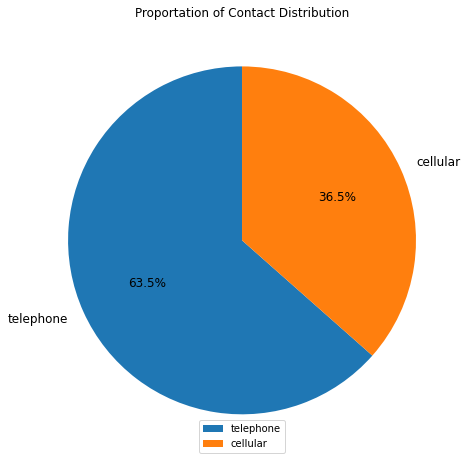

In [47]:
df5 = pd.DataFrame({"Contact Mode":["telephone", "cellular"], "sum":[26144,15044]})
_, ax = plt.subplots(figsize = (8,8))
wedges,_,_ = ax.pie(df5['sum']
                    ,labels=df5["Contact Mode"]
                    ,shadow=False,startangle=90, autopct="%1.1f%%"
                    ,textprops={'fontsize': 12})
ax.legend(wedges,df5["Contact Mode"], loc="lower center", prop={'size': 10});
plt.title('Proportation of Contact Distribution')

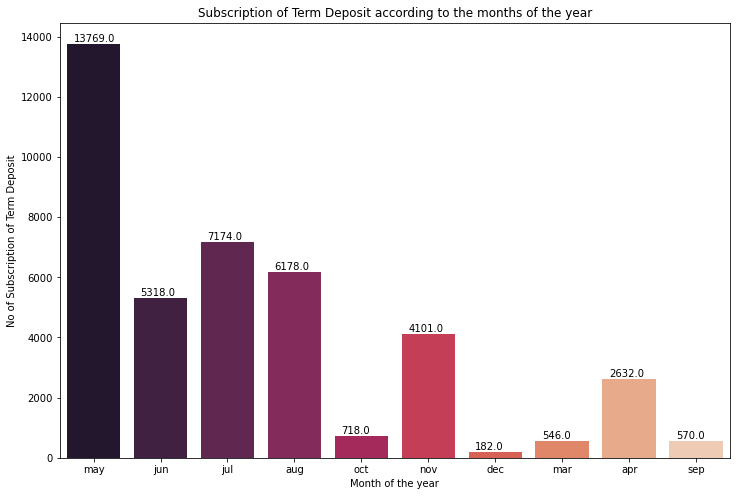

In [48]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x='month',data=bank_marketing, linewidth=3, palette="rocket")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
        
        plt.title("Subscription of Term Deposit according to the months of the year")
        plt.ylabel("No of Subscription of Term Deposit") 
        plt.xlabel("Month of the year")
        

Text(0.5, 1.0, 'Week Count Distribution')

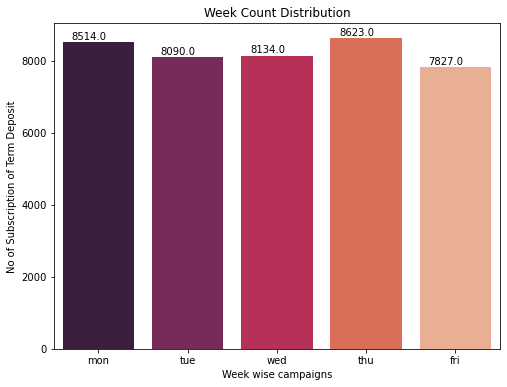

In [49]:
plt.figure(figsize = (8,6))
ax = sns.countplot(x='day_of_week',data=bank_marketing, linewidth=3, palette="rocket")

for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+80))
plt.xlabel("Week wise campaigns")
plt.ylabel("No of Subscription of Term Deposit") 
plt.title("Week Count Distribution")


C:\Users\hassa\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


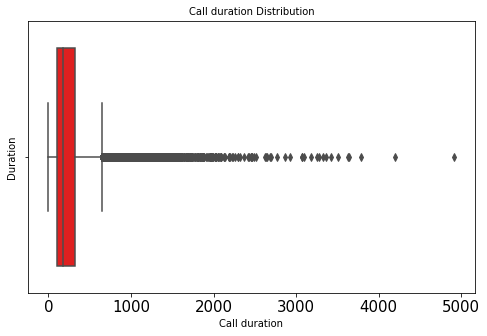

In [50]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
sns.boxplot(x = 'duration', data = bank_marketing, orient = 'v',color="red")
ax.set_xlabel('Call duration', fontsize=10)
ax.set_ylabel('Duration', fontsize=10)
ax.set_title('Call duration Distribution', fontsize=10)
ax.tick_params(labelsize=15)

In [51]:
Q1=bank_marketing['duration'].quantile(q = 0.25)
Q2=bank_marketing['duration'].quantile(q = 0.50)
Q3=bank_marketing['duration'].quantile(q = 0.75)
Q4=bank_marketing['duration'].quantile(q = 1.00)                        

IQR= Q3-Q1


print('1st Quartile: ', Q1)
print('2nd Quartile: ', Q2)
print('3rd Quartile: ', Q3)
print('4th Quartile: ', Q4)
print('IQR: ',IQR)


duration_below  = Q1-(1.5*IQR)
duration_above = Q3+(1.5*IQR)

print('Any duration below', duration_below, 'or above', duration_above, 'can can be considered as Outliers.')


1st Quartile:  102.0
2nd Quartile:  180.0
3rd Quartile:  319.0
4th Quartile:  4918.0
IQR:  217.0
Any duration below -223.5 or above 644.5 can can be considered as Outliers.


In [52]:
#replacing outliers with nan
bank_marketing['duration'][((bank_marketing['duration'] < duration_below) | (bank_marketing['duration'] > duration_above))] = np.nan

<ipython-input-52-0805c528e58d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_marketing['duration'][((bank_marketing['duration'] < duration_below) | (bank_marketing['duration'] > duration_above))] = np.nan
C:\Users\hassa\anaconda3\lib\site-packages\pandas\core\series.py:992: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


In [53]:
print(bank_marketing['duration'].isnull().sum())

2963


In [54]:
bank_marketing['duration'].sample(30)

21594    243.0
68       158.0
36249    327.0
17438     84.0
4764     487.0
4018     104.0
26935      NaN
7403      55.0
9820      29.0
4849     125.0
9266     264.0
31637    193.0
30674     84.0
14670    120.0
12738    161.0
21247     68.0
10637    269.0
21297     22.0
33738    240.0
8529       NaN
12057      NaN
26861    167.0
821      168.0
33108     97.0
30366      NaN
34772     47.0
15812    121.0
11663     32.0
8199     175.0
2388     202.0
Name: duration, dtype: float64

In [55]:
duration_mean = bank_marketing['duration'].mean()
print(duration_mean)
bank_marketing['duration'] = bank_marketing['duration'].fillna(duration_mean)

203.25483322432962


<ipython-input-55-ebf52fe0ca09>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank_marketing['duration'] = bank_marketing['duration'].fillna(duration_mean)


In [56]:
print(bank_marketing['duration'].isnull().sum())

0


In [57]:
# checking other details of age
bank_marketing['duration'].describe()

count    41188.000000
mean       203.254833
std        135.850094
min          0.000000
25%        102.000000
50%        180.000000
75%        265.000000
max        644.000000
Name: duration, dtype: float64

C:\Users\hassa\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


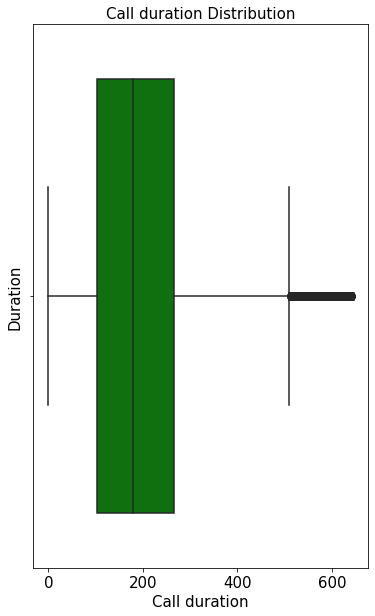

In [58]:
fig, (ax) = plt.subplots(nrows = 1, ncols = 1, figsize = (6,10))
sns.boxplot(x = 'duration', data = bank_marketing,orient = 'v',color="green")
ax.set_xlabel('Call duration', fontsize=15)
ax.set_ylabel('Duration', fontsize=15)
ax.set_title('Call duration Distribution', fontsize=15)
ax.tick_params(labelsize=15)

In [59]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'


# Dividing the duration into buckets

In [60]:
#Imputing  duration columns with 1,2,3,4 using bucket method
def duration(df):

    df.loc[df['duration'] <= 102, 'duration'] = 1
    df.loc[(df['duration'] > 102) & (df['duration'] <= 180)  , 'duration'] = 2
    df.loc[(df['duration'] > 180) & (df['duration'] <= 265)  , 'duration'] = 3
    df.loc[(df['duration'] > 265) & (df['duration'] <= 644), 'duration'] = 4
    df.loc[df['duration']  > 644, 'duration'] = 5
    return df
duration(bank_marketing).head()


,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,may,mon,3.0,1,999,0,nonexistent
1,telephone,may,mon,2.0,1,999,0,nonexistent
2,telephone,may,mon,3.0,1,999,0,nonexistent
3,telephone,may,mon,2.0,1,999,0,nonexistent
4,telephone,may,mon,4.0,1,999,0,nonexistent


In [61]:
d_mons = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 
    'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10,
    'nov':11, 'dec':12}

bank_marketing.month=bank_marketing.month.map(d_mons)

In [62]:
bank_marketing.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,5,mon,3.0,1,999,0,nonexistent
1,telephone,5,mon,2.0,1,999,0,nonexistent
2,telephone,5,mon,3.0,1,999,0,nonexistent
3,telephone,5,mon,2.0,1,999,0,nonexistent
4,telephone,5,mon,4.0,1,999,0,nonexistent


In [63]:
week_day = {'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 
    'sat':6, 'sun':7}

bank_marketing.day_of_week=bank_marketing.day_of_week.map(week_day)

In [64]:
bank_marketing[["month", "day_of_week"]] = bank_marketing[["month","day_of_week"]].apply(pd.to_numeric)


In [65]:
bank_marketing.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,telephone,5,1,3.0,1,999,0,nonexistent
1,telephone,5,1,2.0,1,999,0,nonexistent
2,telephone,5,1,3.0,1,999,0,nonexistent
3,telephone,5,1,2.0,1,999,0,nonexistent
4,telephone,5,1,4.0,1,999,0,nonexistent


In [66]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   contact      41188 non-null  object 
 1   month        41188 non-null  int64  
 2   day_of_week  41188 non-null  int64  
 3   duration     41188 non-null  float64
 4   campaign     41188 non-null  int64  
 5   pdays        41188 non-null  int64  
 6   previous     41188 non-null  int64  
 7   poutcome     41188 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [67]:
bank_marketing.sample(5)

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
23374,cellular,8,3,1.0,14,999,0,nonexistent
32819,cellular,5,1,4.0,2,999,0,nonexistent
9907,telephone,6,3,3.0,2,999,0,nonexistent
1140,telephone,5,3,4.0,2,999,0,nonexistent
32336,cellular,5,5,2.0,2,999,1,failure


Label Encoder on bank Marketing Data
Machine learning algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values

In [68]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bank_marketing['contact'] = le.fit_transform(bank_marketing['contact']).astype(str).astype(int)
bank_marketing['poutcome'] = le.fit_transform(bank_marketing['poutcome']).astype(str).astype(int)

In [69]:
bank_marketing.to_csv('bank_marketing.csv')

In [70]:
bank_marketing.head()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
0,1,5,1,3.0,1,999,0,1
1,1,5,1,2.0,1,999,0,1
2,1,5,1,3.0,1,999,0,1
3,1,5,1,2.0,1,999,0,1
4,1,5,1,4.0,1,999,0,1


In [71]:
bank_marketing.describe()

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.365252,6.607896,2.979581,2.495411,2.567593,962.475454,0.172963,0.930101
std,0.481507,2.040998,1.411514,1.117039,2.770014,186.910907,0.494901,0.362886
min,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,5.000000,2.000000,1.000000,1.000000,999.000000,0.000000,1.000000
50%,0.000000,6.000000,3.000000,2.000000,2.000000,999.000000,0.000000,1.000000
75%,1.000000,8.000000,4.000000,3.000000,3.000000,999.000000,0.000000,1.000000
max,1.000000,12.000000,5.000000,4.000000,56.000000,999.000000,7.000000,2.000000


In [72]:
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   contact      41188 non-null  int32  
 1   month        41188 non-null  int64  
 2   day_of_week  41188 non-null  int64  
 3   duration     41188 non-null  float64
 4   campaign     41188 non-null  int64  
 5   pdays        41188 non-null  int64  
 6   previous     41188 non-null  int64  
 7   poutcome     41188 non-null  int32  
dtypes: float64(1), int32(2), int64(5)
memory usage: 2.2 MB


In [73]:
corr=bank_marketing.corr()
corr

,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome
contact,1.000000,-0.324315,0.019583,-0.022840,0.077368,0.117970,-0.212848,0.118744
month,-0.324315,1.000000,-0.006959,-0.055570,-0.030635,-0.079556,0.063754,0.028950
day_of_week,0.019583,-0.006959,1.000000,-0.007520,0.015098,0.006765,0.004013,-0.012788
duration,-0.022840,-0.055570,-0.007520,1.000000,-0.132341,-0.084064,0.058135,0.038291
campaign,0.077368,-0.030635,0.015098,-0.132341,1.000000,0.052584,-0.079141,0.032586
pdays,0.117970,-0.079556,0.006765,-0.084064,0.052584,1.000000,-0.587514,-0.475619
previous,-0.212848,0.063754,0.004013,0.058135,-0.079141,-0.587514,1.000000,-0.313110
poutcome,0.118744,0.028950,-0.012788,0.038291,0.032586,-0.475619,-0.313110,1.000000


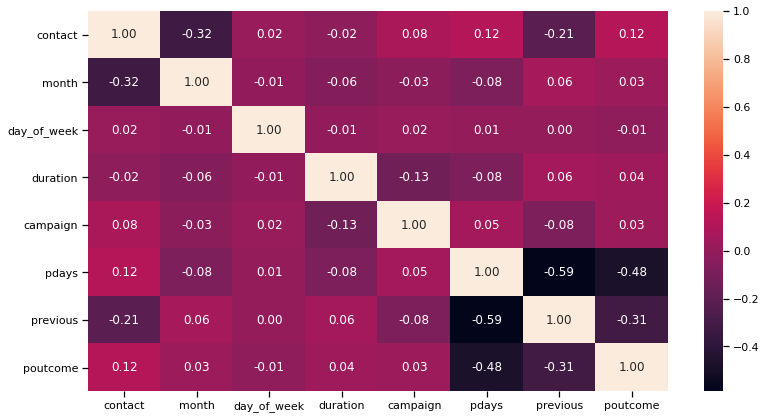

In [74]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (13,7))
a = sns.heatmap(corr, annot = True, fmt = ".2f")

# Economic Data

In [75]:
# Slicing market economic index data 
economicbankdata = bankdata[["emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed","y"]]
economicbankdata.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,no
1,1.1,93.994,-36.4,4.857,5191.0,no
2,1.1,93.994,-36.4,4.857,5191.0,no
3,1.1,93.994,-36.4,4.857,5191.0,no
4,1.1,93.994,-36.4,4.857,5191.0,no


In [76]:
econ_corr=economicbankdata.corr()
econ_corr

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
emp.var.rate,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,0.906970,0.522034,0.100513,0.945154,1.000000


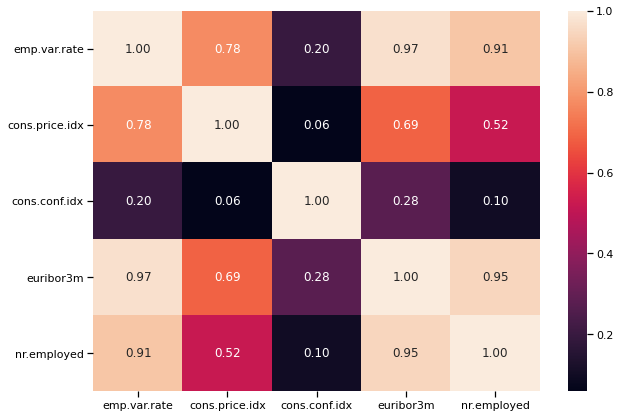

In [77]:
sns.set_context("notebook",font_scale = 1.0, rc = {"lines.linewidth":2.5})
plt.figure(figsize = (10,7))
a = sns.heatmap(econ_corr, annot = True, fmt = ".2f")

High correlation:
emp.var.rate is is highly correlated euribor3m  & nr.employed variables so we can incldude these variables

# Combining 3 dataframes:
At this stage, we are combining all these three data-frames to make nice and clean version of dataset which is ready for Featuring Engineering. After we have successfully create new features we would be able to research throughly as what new feature is making the highest influence in trade deposite subscription. 

In [78]:
combinebankinfo= pd.concat([clientbankdata_copy1, bank_marketing, economicbankdata], axis = 1)
combinebankinfo.shape

(41188, 48)

In [79]:
combinebankinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 48 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int32  
 1   job_admin.                     41188 non-null  uint8  
 2   job_blue-collar                41188 non-null  uint8  
 3   job_entrepreneur               41188 non-null  uint8  
 4   job_housemaid                  41188 non-null  uint8  
 5   job_management                 41188 non-null  uint8  
 6   job_retired                    41188 non-null  uint8  
 7   job_self-employed              41188 non-null  uint8  
 8   job_services                   41188 non-null  uint8  
 9   job_student                    41188 non-null  uint8  
 10  job_technician                 41188 non-null  uint8  
 11  job_unemployed                 41188 non-null  uint8  
 12  job_unknown                    41188 non-null 

In [80]:
bankcorr = combinebankinfo.corr()
bankcorr

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.090483,0.013375,0.044661,0.080294,0.078006,0.232925,0.006874,-0.049218,-0.176706,...,-0.002449,0.013745,0.009186,-0.021404,0.014207,0.074252,0.045217,0.090935,0.086048,0.070992
job_admin.,-0.090483,1.000000,-0.313313,-0.111417,-0.094595,-0.160892,-0.121502,-0.110021,-0.190063,-0.085748,...,-0.011558,0.011745,-0.025398,0.018888,0.010078,-0.024572,-0.041840,0.032341,-0.023831,-0.023446
job_blue-collar,0.013375,-0.313313,1.000000,-0.103050,-0.087492,-0.148810,-0.112378,-0.101759,-0.175791,-0.079308,...,0.017157,-0.001775,0.065335,-0.054845,-0.019261,0.057264,0.075322,-0.101567,0.046775,0.063921
job_entrepreneur,0.044661,-0.111417,-0.103050,1.000000,-0.031113,-0.052918,-0.039962,-0.036186,-0.062513,-0.028203,...,-0.000979,-0.002203,0.019246,-0.013239,-0.009865,0.009363,0.009825,-0.032306,0.018744,0.024581
job_housemaid,0.080294,-0.094595,-0.087492,-0.031113,1.000000,-0.044929,-0.033929,-0.030723,-0.053075,-0.023945,...,-0.001803,0.004226,-0.001649,-0.011569,0.016095,0.036367,0.028335,0.035374,0.036392,0.028105
job_management,0.078006,-0.160892,-0.148810,-0.052918,-0.044929,1.000000,-0.057708,-0.052255,-0.090272,-0.040726,...,0.000882,-0.009135,0.000254,0.006735,-0.008237,-0.016642,-0.025268,0.000784,-0.001590,-0.001475
job_retired,0.232925,-0.121502,-0.112378,-0.039962,-0.033929,-0.057708,1.000000,-0.039462,-0.068171,-0.030756,...,0.018351,-0.006847,-0.072084,0.065113,0.016130,-0.103678,-0.052251,0.087033,-0.102454,-0.129367
job_self-employed,0.006874,-0.110021,-0.101759,-0.036186,-0.030723,-0.052255,-0.039462,1.000000,-0.061730,-0.027849,...,-0.011311,0.006361,0.014307,-0.011231,-0.005746,0.001477,-0.005122,0.000592,0.007421,0.009519
job_services,-0.049218,-0.190063,-0.175791,-0.062513,-0.053075,-0.090272,-0.068171,-0.061730,1.000000,-0.048110,...,0.004619,0.002383,0.030573,-0.011885,-0.022803,0.019431,0.033282,-0.055561,0.014666,0.020629
job_student,-0.176706,-0.085748,-0.079308,-0.028203,-0.023945,-0.040726,-0.030756,-0.027849,-0.048110,1.000000,...,0.024195,-0.024657,-0.096367,0.104671,0.007499,-0.139725,-0.062117,0.010029,-0.147551,-0.165365


In [81]:
bankcorr.to_csv('bankcorr.csv')

In [82]:
def get_redundant_pairs(bankcorr):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = bankcorr.columns
    for i in range(0, bankcorr.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(bankcorr, n=5):
    au_corr = bankcorr.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(bankcorr)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(bankcorr, 50))


Top Absolute Correlations
housing_unknown   loan_unknown                     1.000000
default_no        default_unknown                  0.999908
emp.var.rate      euribor3m                        0.995691
euribor3m         nr.employed                      0.987471
emp.var.rate      nr.employed                      0.981645
housing_no        housing_yes                      0.949334
emp.var.rate      cons.price.idx                   0.925485
loan_no           loan_yes                         0.913321
cons.price.idx    euribor3m                        0.895179
marital_married   marital_single                   0.860736
contact           cons.price.idx                   0.858262
cons.price.idx    nr.employed                      0.846535
previous          nr.employed                      0.813394
                  euribor3m                        0.779324
job_technician    education_professional.course    0.775783
previous          emp.var.rate                     0.766842
pdays         

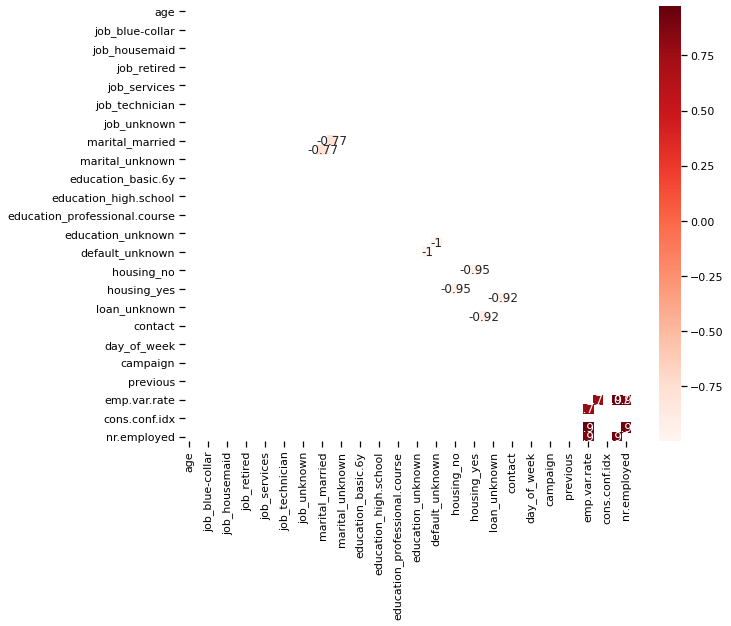

In [83]:
#dfCorr = df.corr()
filteredDf = bankcorr[((bankcorr >= .7) | (bankcorr <= -.7)) & (bankcorr !=1.000)]
plt.figure(figsize=(10,8))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

# *************************** Assignment 3************************************

In [84]:
X = combinebankinfo.loc[:, combinebankinfo.columns != 'y']
y= combinebankinfo.loc[:, combinebankinfo.columns == 'y']

 We calculate feature importance Using Random Forest Classifier summarizing the calculated feature importance scores as listed below.

In [98]:
# This line represents the model. 
rfc = RandomForestClassifier() 
# Fit model on your training data.
rfc.fit(X, y.values.ravel()) 
#Score it on your testing data.
rfc.score(X, y)

feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)

In [99]:
feature_importances.head()

,importance
euribor3m,0.141131
duration,0.110334
campaign,0.074805
day_of_week,0.062900
age,0.055751


We used logistic regression below for plotting to calculate the highest features which counts towards term deposit subscription

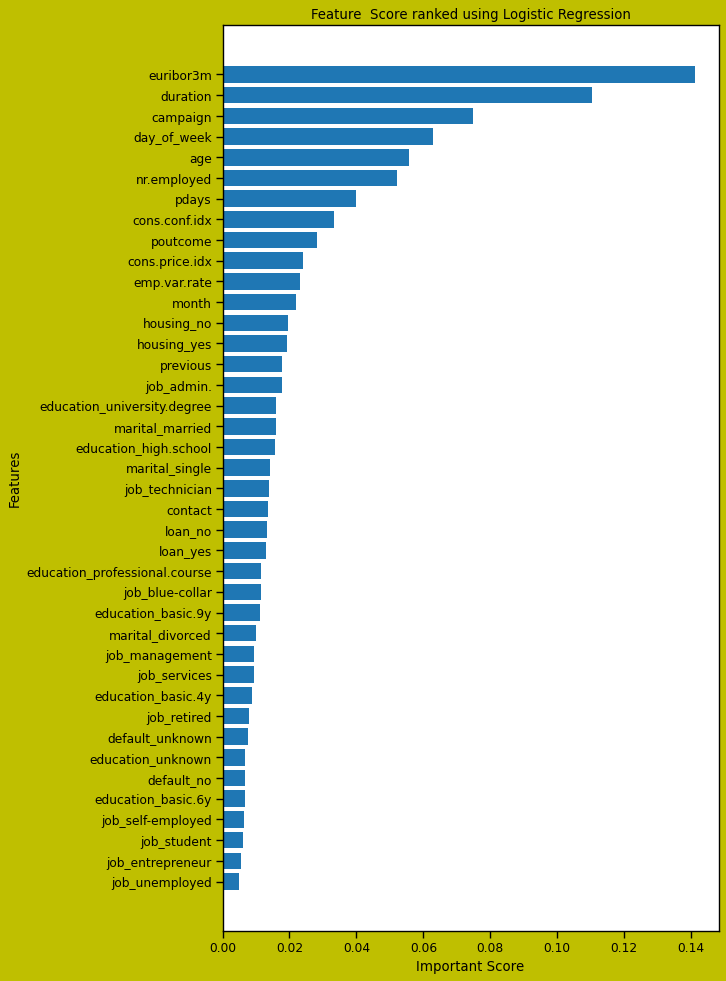

In [100]:
number = np.min([40, len(X.columns)])
ylog = np.arange(number)
# Feature importance for top num & sort in reverse order
valuestoplot = feature_importances.iloc[:number].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:number].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='y', edgecolor='k');
plt.barh(ylog, valuestoplot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Important Score')
plt.title('Feature  Score ranked using Logistic Regression')
plt.yticks(ylog, feature_labels)
plt.show()

In [101]:
feature_importances.to_csv('feature_importance1.csv')

In [102]:
combinebankinfo['y'].replace(['yes', 'no'],[1,0 ], inplace=True)

In [103]:
combinebankinfo[['y']] = combinebankinfo[['y']].apply(pd.to_numeric)

In [104]:
combinebankinfo['y'].sample(30)

26739    0
12708    0
19359    0
36303    0
39779    0
40904    0
35503    0
13322    0
28945    0
2244     0
36999    0
36876    0
2734     0
22384    0
17426    0
25662    0
27107    0
40026    1
28569    0
20738    0
4614     0
24909    0
21556    0
34865    0
9774     0
36261    0
24050    1
23463    0
8497     0
12455    1
Name: y, dtype: int64

In [105]:
combinebankinfo.columns

Index(['y', 'euribor3m', 'duration', 'campaign', 'day_of_week', 'age',
       'nr.employed', 'pdays', 'cons.conf.idx', 'emp.var.rate', 'poutcome',
       'cons.price.idx', 'month', 'housing_yes'],
      dtype='object')

In [106]:
combinebankinfo.sample(30)

,y,euribor3m,duration,campaign,day_of_week,age,nr.employed,pdays,cons.conf.idx,emp.var.rate,poutcome,cons.price.idx,month,housing_yes
39415,0,0.640,3.0,2,4,3,5008.7,999,-34.6,-1.8,1,93.749,4,1
3260,0,4.860,2.0,1,4,4,5191.0,999,-36.4,1.1,1,93.994,5,0
14630,0,4.961,4.0,2,2,3,5228.1,999,-42.7,1.4,1,93.918,7,0
19649,0,4.968,2.0,1,4,2,5228.1,999,-36.1,1.4,1,93.444,8,1
15689,0,4.960,1.0,1,1,2,5228.1,999,-42.7,1.4,1,93.918,7,0
14407,0,4.962,3.0,4,1,1,5228.1,999,-42.7,1.4,1,93.918,7,0
5444,0,4.857,1.0,2,5,4,5191.0,999,-36.4,1.1,1,93.994,5,1
14450,0,4.961,1.0,4,2,2,5228.1,999,-42.7,1.4,1,93.918,7,0
9071,0,4.866,2.0,3,4,3,5228.1,999,-41.8,1.4,1,94.465,6,1
33572,0,1.291,1.0,2,2,3,5099.1,999,-46.2,-1.8,1,92.893,5,1


# Feature Importance

We created a new DataFrame of feature importance  with random forest classifier calculation as used above . These are the main features of the data set making the most influence on the term desposite subscription.

In [107]:
combinebankinfo = combinebankinfo[[
'y',
'euribor3m',
'duration',                                
'campaign',
'day_of_week',
'age',
'nr.employed',
'pdays',
'cons.conf.idx',
'emp.var.rate',
'poutcome',
'cons.price.idx',
'month',
'housing_yes',
]]

In [108]:
combinebankinfo.sample(30)

,y,euribor3m,duration,campaign,day_of_week,age,nr.employed,pdays,cons.conf.idx,emp.var.rate,poutcome,cons.price.idx,month,housing_yes
29766,0,1.405,4.0,1,1,1,5099.1,999,-47.1,-1.8,1,93.075,4,1
31456,0,1.334,4.0,2,3,4,5099.1,999,-46.2,-1.8,1,92.893,5,0
7341,0,4.864,4.0,1,5,3,5191.0,999,-36.4,1.1,1,93.994,5,1
38905,0,0.716,4.0,2,2,2,5017.5,6,-30.1,-3.4,2,92.649,11,0
26981,0,4.076,1.0,5,4,2,5195.8,999,-42.0,-0.1,1,93.200,11,0
17837,0,4.961,1.0,2,2,3,5228.1,999,-42.7,1.4,1,93.918,7,0
1539,0,4.855,1.0,5,4,3,5191.0,999,-36.4,1.1,1,93.994,5,1
15542,0,4.957,4.0,7,5,3,5228.1,999,-42.7,1.4,1,93.918,7,0
5322,0,4.857,4.0,4,5,1,5191.0,999,-36.4,1.1,1,93.994,5,0
12494,0,4.960,2.0,1,1,2,5228.1,999,-42.7,1.4,1,93.918,7,0


In [109]:
combinebankinfo.describe()

,y,euribor3m,duration,campaign,day_of_week,age,nr.employed,pdays,cons.conf.idx,emp.var.rate,poutcome,cons.price.idx,month,housing_yes
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.112654,3.621291,2.495411,2.567593,2.979581,2.442872,5167.035911,962.475454,-40.502600,0.081886,0.930101,93.575664,6.607896,0.523842
std,0.316173,1.734447,1.117039,2.770014,1.411514,1.116283,72.251528,186.910907,4.628198,1.570960,0.362886,0.578840,2.040998,0.499437
min,0.000000,0.634000,1.000000,1.000000,1.000000,1.000000,4963.600000,0.000000,-50.800000,-3.400000,0.000000,92.201000,3.000000,0.000000
25%,0.000000,1.344000,1.000000,1.000000,2.000000,1.000000,5099.100000,999.000000,-42.700000,-1.800000,1.000000,93.075000,5.000000,0.000000
50%,0.000000,4.857000,2.000000,2.000000,3.000000,2.000000,5191.000000,999.000000,-41.800000,1.100000,1.000000,93.749000,6.000000,1.000000
75%,0.000000,4.961000,3.000000,3.000000,4.000000,3.000000,5228.100000,999.000000,-36.400000,1.400000,1.000000,93.994000,8.000000,1.000000
max,1.000000,5.045000,4.000000,56.000000,5.000000,4.000000,5228.100000,999.000000,-26.900000,1.400000,2.000000,94.767000,12.000000,1.000000


In [110]:
combinebankinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   y               41188 non-null  int64  
 1   euribor3m       41188 non-null  float64
 2   duration        41188 non-null  float64
 3   campaign        41188 non-null  int64  
 4   day_of_week     41188 non-null  int64  
 5   age             41188 non-null  int32  
 6   nr.employed     41188 non-null  float64
 7   pdays           41188 non-null  int64  
 8   cons.conf.idx   41188 non-null  float64
 9   emp.var.rate    41188 non-null  float64
 10  poutcome        41188 non-null  int32  
 11  cons.price.idx  41188 non-null  float64
 12  month           41188 non-null  int64  
 13  housing_yes     41188 non-null  uint8  
dtypes: float64(6), int32(2), int64(5), uint8(1)
memory usage: 3.8 MB


In [111]:
X = combinebankinfo.loc[:, combinebankinfo.columns != 'y']
y = combinebankinfo.loc[:, combinebankinfo.columns == 'y']

In [112]:
X.columns

Index(['euribor3m', 'duration', 'campaign', 'day_of_week', 'age',
       'nr.employed', 'pdays', 'cons.conf.idx', 'emp.var.rate', 'poutcome',
       'cons.price.idx', 'month', 'housing_yes'],
      dtype='object')

In [113]:
y.columns

Index(['y'], dtype='object')

In [114]:
y.sample(30)

,y
27377,0
38725,0
15599,0
26159,0
34453,0
17427,0
19357,0
26992,0
3048,0
19942,0


In [115]:
y.describe()

,y
count,41188.000000
mean,0.112654
std,0.316173
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [116]:
y['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

As we derived earlier, our dataset is imbalanced with only 11.3% of client that has subscribed to the bank term deposit. So, we are leveraging SMOTE functionality to produce oversampling to balance our response variable y before we split clean dataset in to test and train as per standard best practice for modeling. We will perform modeling on balanced dataset. We have chosen 70-30 split as train-test data. To get the best fit based on the nature of dataset and the response variable we are predicting, we are going to build 4 models:

In [117]:
sm = SMOTE(random_state=0)
X_SMOTE, y_SMOTE = sm.fit_resample(X, y)
pd.Series(y_SMOTE['y']).value_counts()

0    36548
1    36548
Name: y, dtype: int64

In [118]:
bankcorr.to_csv('tableau.csv')

# Model Selection

In [225]:
import sklearn.linear_model as linear_model
from sklearn.preprocessing import StandardScaler, label_binarize

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
perp_model = linear_model.Perceptron().fit(X_train_std,y_train.values.ravel())
y_pred = perp_model.predict(X_test_std)
print("Accuracy: ",round(accuracy_score(y_test, y_pred),2))

Accuracy:  0.84


Random Forest

In [226]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, np.ravel(y_train,order='C'))
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
bank_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

print(round(bank_random_forest,2,), "% :\n")
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print("\n")
print("Confusion matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score :\n")
print(accuracy_score(y_test,y_pred)*100)

96.27 % :

Classification Report :

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10970
           1       0.58      0.42      0.49      1387

    accuracy                           0.90     12357
   macro avg       0.76      0.69      0.72     12357
weighted avg       0.89      0.90      0.89     12357



Confusion matrix:

[[10555   415]
 [  810   577]]


Accuracy score :

90.08659059642308


In [227]:
banklogreg = LogisticRegression()
banklogreg.fit(X_train, np.ravel(y_train,order='C'))
y_pred = banklogreg.predict(X_test)
bank_log = round(banklogreg.score(X_train, y_train) * 100, 2)
print(round(bank_log,2,), "% :\n")
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print("\n")
print("Confusion matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score :\n")
print(accuracy_score(y_test,y_pred)*100)

90.43 % :

Classification Report :

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     10970
           1       0.71      0.27      0.39      1387

    accuracy                           0.91     12357
   macro avg       0.81      0.63      0.67     12357
weighted avg       0.89      0.91      0.89     12357



Confusion matrix:

[[10817   153]
 [ 1017   370]]


Accuracy score :

90.53168244719592


C:\Users\hassa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Linear SVC

In [228]:
bank_linear_svc = LinearSVC()
bank_linear_svc.fit(X_train, np.ravel(y_train,order='C'))
y_pred = bank_linear_svc.predict(X_test)
bank_svc = round(bank_linear_svc.score(X_train, y_train) * 100, 2)
print(round(bank_svc,2,), "% :\n")
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print("\n")
print("Confusion matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score :\n")
print(accuracy_score(y_test,y_pred)*100)

90.02 % :

Classification Report :

              precision    recall  f1-score   support

           0       0.90      0.99      0.95     10970
           1       0.75      0.17      0.28      1387

    accuracy                           0.90     12357
   macro avg       0.83      0.58      0.61     12357
weighted avg       0.89      0.90      0.87     12357



Confusion matrix:

[[10892    78]
 [ 1149   238]]


Accuracy score :

90.07040543821316


C:\Users\hassa\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Decision Tree

In [229]:
bank_dt = DecisionTreeClassifier()
bank_dt.fit(X_train, y_train)
y_pred = bank_dt.predict(X_test)
bank_decision_tree = round(bank_dt.score(X_train, y_train) * 100, 2)
print(round(bank_decision_tree,2,), "% :\n")
print("Classification Report :\n")
print(classification_report(y_test,y_pred))
print("\n")
print("Confusion matrix:\n")
print(confusion_matrix(y_test,y_pred))
print("\n")
print("Accuracy score :\n")
print(accuracy_score(y_test,y_pred)*100)

96.28 % :

Classification Report :

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10970
           1       0.51      0.39      0.44      1387

    accuracy                           0.89     12357
   macro avg       0.72      0.67      0.69     12357
weighted avg       0.88      0.89      0.88     12357



Confusion matrix:

[[10454   516]
 [  844   543]]


Accuracy score :

88.99409241725338


In [230]:
"Comparison of performance metrics of all three models"
results = pd.DataFrame({
    'Model': ['Random Forest', 
              'Logistic Regression', 
              'Support Vector Machines', 
              'Decision Tree'],
    'Score': [bank_random_forest,
              bank_log,
              bank_svc,
              bank_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
96.28,Decision Tree
96.27,Random Forest
90.43,Logistic Regression
90.02,Support Vector Machines


We did four types of modelling , 
1- Random Forest
2- Decision Tree
3- Logistic Regression
4- Support Vector Machines

The highest accuracy score we received was of Random Forest @ 96.4 which means our model will correctly predict the outcome 96% of the time.



Plot ROC and compare AUC

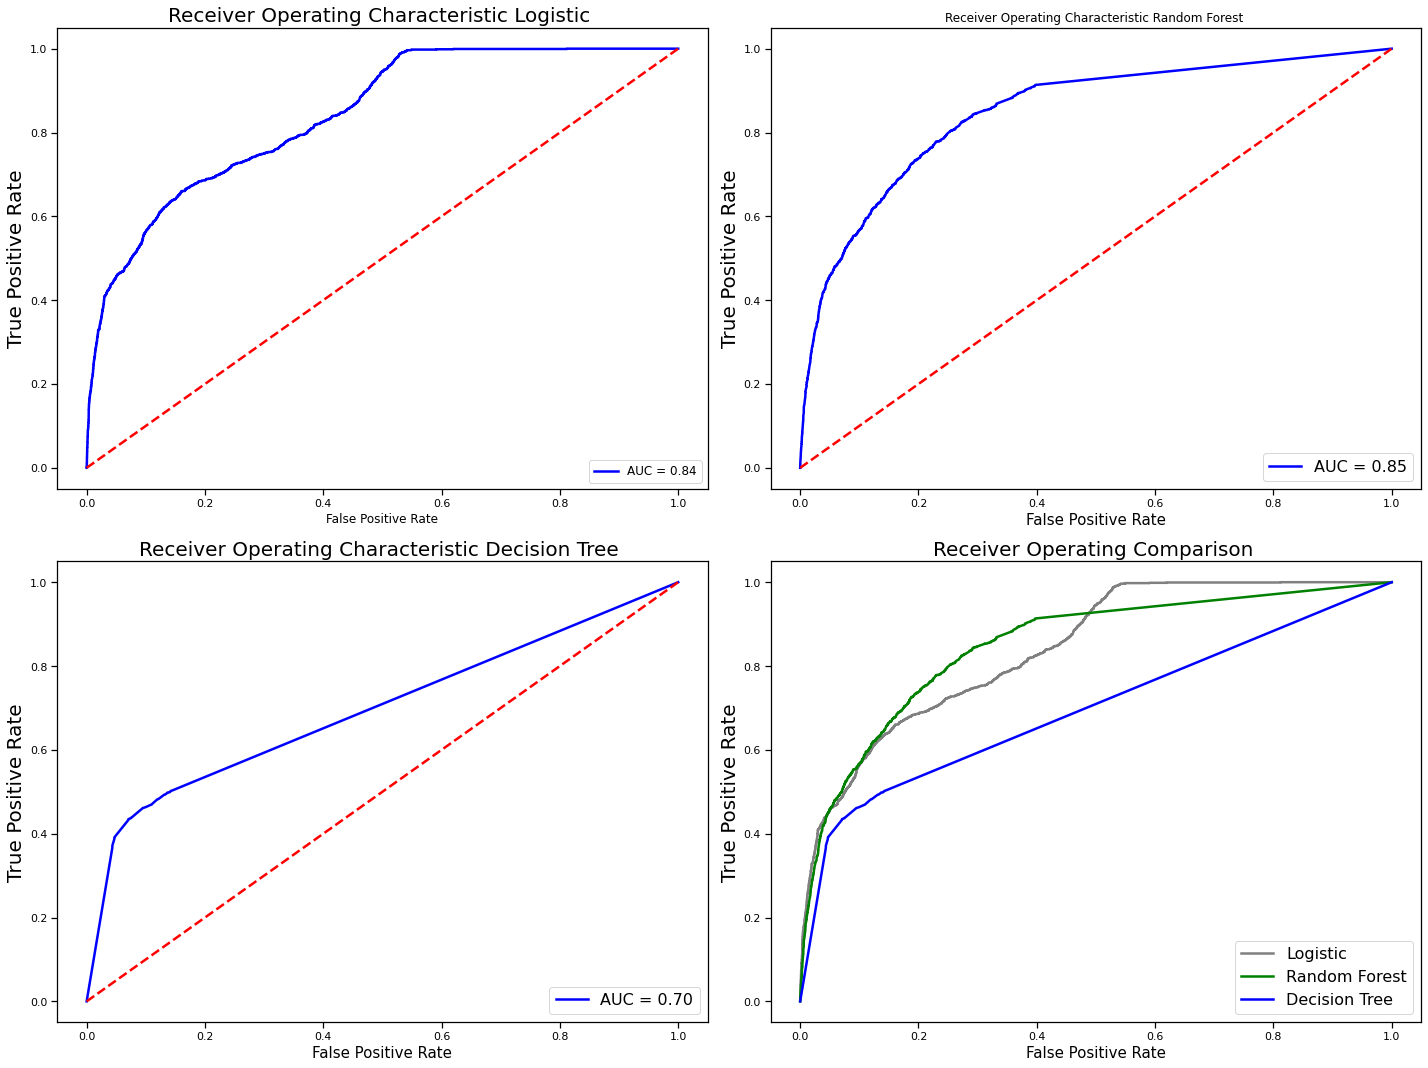

In [231]:
from sklearn import metrics

fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (20,15))

#LogisticRegression
probs = banklogreg.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=20)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 12})

#RANDOM FOREST --------------------
probs = random_forest.predict_proba(X_test)
preds = probs[:,1]
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_test, preds)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[0,1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Random Forest ',fontsize=12)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 16})

#DECISION TREE ---------------------
probs = bank_dt.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1,0].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=20)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 16})

#ALL PLOTS ----------------------------------
ax_arr[1,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='grey')
ax_arr[1,1].plot(fprrfc, tprrfc, 'b', label = 'Random Forest', color='green')
ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='blue')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=20)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 16})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

We short listed top 3 models for ROC-AUC curve. 

After ploting the ROC AUC Curve, we can see that Random Forest is the best model from All the three models we have chosen as it has the maximum area under the curve.




# Summary

Through this project, we created a machine learning model that can predict how likely clients will subscribe to a bank term deposit.
The best model was Random forest classifier in terms of accuracy and ROC. Our model’s test performance  is 96.3 accuracy score with highest AUC .
From the Random forest theories we can also claim that random forest will be a better model for the given case in hand as it builds multiple decision trees according to the features available. When using random forest we can also add new features to address our ever changing requirements such as new type of job or euribor3m rate. 
After reviewing all the features we can suggest to target customers such as  euribor3m and duration are high.We can also see from out findings that campaign ,day_of week counts towards signing up for term deposit  compare to other features.